<IPython.core.display.Javascript object>


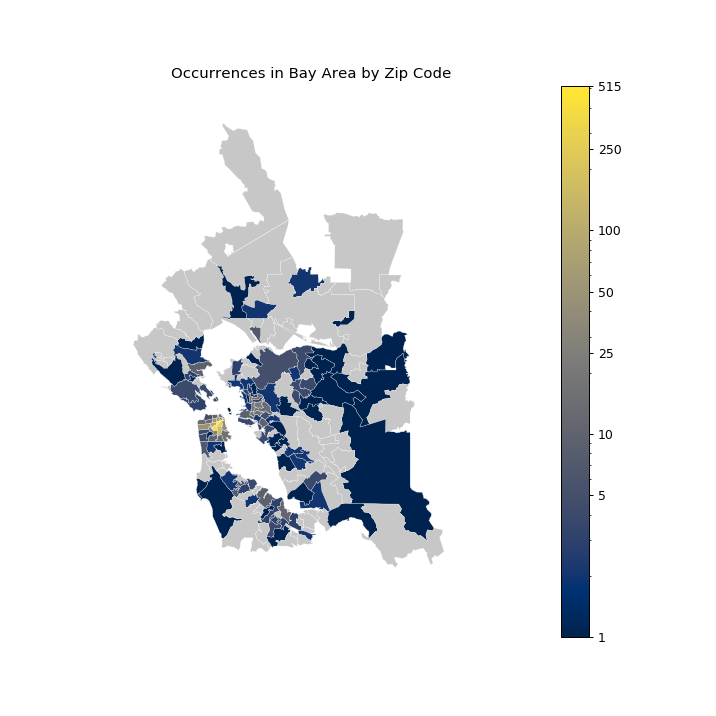

In [1]:
import shapefile
# from https://data.sfgov.org/api/geospatial/u5j3-svi6?method=export&format=Shapefile
sf = shapefile.Reader(
    '../local_data/Bay Area ZIP Codes/geo_export_a7763940-12fa-4382-ba92-5662bb46a811')
sorted([(sf.shapeRecord(i).record.zip,sf.shapeRecord(i).record.po_name)
        for i in range(len(sf.shapeRecords()))])

# import matplotlib
# matplotlib.use('qt5agg')
%matplotlib notebook
import matplotlib.pyplot as plt
f = plt.figure()
plt.plot([0,0])

import pandas as pd
df = pd.read_csv('../shared_copy/addresses_from_raw.txt', sep="|",index_col=None)
df.columns = ['Address','State','Zip']
zc = df.Zip.value_counts()
bad_gray = 200/256.

from matplotlib import cm, colors
import numpy as np
colormap = cm.ScalarMappable(
    norm=colors.LogNorm(1, zc.max()), 
    cmap=cm.cividis)
# colormap.set_clim([zip_counts.min(),zip_counts.max()])

for sr in sf.shapeRecords():
    shape = sr.shape
    _zip = int(sr.record.zip)
    _color = colormap.to_rgba(zc[_zip]) if _zip in zc else (bad_gray,bad_gray,bad_gray,1)
    patch = plt.Polygon(shape.points, 
                        color=_color,
                         ec=(1,1,1,1),
                       lw=0.2,
                       hatch='' if _zip not in zc else '')
    plt.gca().add_patch(patch)
plt.xlim([-123,-121])
plt.ylim([37,39])
plt.gcf().set_size_inches((8,8))
cbar_ticks = [0,1,5,10,25,50,100,250,zc.max()]
cbar = plt.colorbar(colormap, ticks=cbar_ticks)
cbar.ax.set_yticklabels(cbar_ticks)
plt.axis(False)
plt.title("Occurrences in Bay Area by Zip Code")
plt.savefig('sf_zip_mentions.svg')

In [2]:
df.Zip.value_counts()

94102    515
94114    426
94103    304
94110    159
94105    120
        ... 
4111       1
92188      1
92236      1
90213      1
94244      1
Name: Zip, Length: 443, dtype: int64

In [4]:
print([df.Zip.map(lambda a: len(str(a)) == 5).sum(),
df.Zip.map(lambda a: str(a)[0] == '9').sum()])

[3366, 3255]


In [6]:
df.Zip[df.Zip.map(lambda a: len(str(a)) != 5)]

318     4111
406     5320
854     1984
1355    4289
1356    2107
1357    3194
1358    5194
1359    3107
1360    3114
1361    3121
2053      48
2269    2884
3097    9309
3140    7525
3156    7319
Name: Zip, dtype: int64

In [7]:
df.iloc[0,:]

Address    3543 18TH STREET SUITE 11 SAN FRANCISCO,
State                                            CA
Zip                                           94110
Name: 0, dtype: object

In [8]:
with open('../shared_copy/addresses_from_raw.txt') as f:
    lines = f.readlines()

In [9]:
lines = [a.replace('|',', ').strip() for a in lines]

In [11]:
%matplotlib inline

In [11]:
from matplotlib import pyplot as plt
zip_counts = df.Zip.value_counts().sort_index()
zip_counts = zip_counts[zip_counts > 3]
x = range(len(zip_counts))
plt.interactive(False)
fig = plt.bar(x,zip_counts.tolist())
plt.yscale('log')
_ = plt.xticks(x, labels=zip_counts.index, rotation='vertical')
_ = plt.title('Count of Zip codes found >3 Times')
plt.gcf().set_size_inches((10,3))
plt.savefig('Zip_Histogram_>3found.png')
plt.show()

In [8]:
import shapefile
# from https://data.sfgov.org/api/geospatial/u5j3-svi6?method=export&format=Shapefile
sf = shapefile.Reader('../local_data/Bay Area ZIP Codes/geo_export_a7763940-12fa-4382-ba92-5662bb46a811')
sorted([(sf.shapeRecord(i).record.zip,sf.shapeRecord(i).record.po_name)  for i in range(len(sf.shapeRecords()))])[:10]
# unfortunately this shapefile data is old. (probably 1990 or 2000 census data)
# for example, Mission Hall is 94158 which does not appear

[('94002', 'BELMONT'),
 ('94005', 'BRISBANE'),
 ('94010', 'BURLINGAME'),
 ('94014', 'DALY CITY'),
 ('94015', 'DALY CITY'),
 ('94019', 'HALF MOON BAY'),
 ('94022', 'LOS ALTOS'),
 ('94024', 'LOS ALTOS'),
 ('94025', 'MENLO PARK'),
 ('94027', 'ATHERTON')]

In [8]:
import pandas as pd
def records_to_df(sf):
    sfdf = pd.DataFrame([[i.bbox, i.points, i.parts, i.shapeType, i.shapeTypeName] for i in sf.shapes()])
    sfdf.columns = ['bbox','points','parts','shapeType','shapeTypeName']
    return sfdf
sfdf = records_to_df(sf)
sfdf.head()
# dir(sf.shape(0))

,bbox,points,parts,shapeType,shapeTypeName
0,"[-122.49759200203691, 38.194646998377124, -122...","[(-122.10329200180091, 38.51328299864645), (-1...","[0, 349]",5,POLYGON
1,"[-122.10708000088981, 38.230421000579476, -121...","[(-121.947475002335, 38.30151100055196), (-121...",[0],5,POLYGON
2,"[-121.94685900206704, 38.2323429987148, -121.5...","[(-121.65335500334429, 38.31338700062926), (-1...",[0],5,POLYGON
3,"[-122.5740590023058, 38.11546899994996, -122.3...","[(-122.406843003057, 38.1556819994161), (-122....",[0],5,POLYGON
4,"[-122.42499000270834, 38.15224700053014, -122....","[(-122.29368500225117, 38.155237998774204), (-...",[0],5,POLYGON


Correlations:

In [ ]:
prev = pd.read_excel('SanFrancisco_AIDSVu_Zip-Code-Data-Sets_2017.xlsx', header=2)
# from https://aidsvu.org/resources/#/2017 select San Francisco and hit Download XLSX on the right
prev.head()

In [11]:
# per 100,000
pts = []
for z in prev['Zip Code']:
    if z in zc:
        data = (prev['Zip Code Rate'][prev['Zip Code'] == z].iloc[0], zc[z])
        pts.append(data)
        print(data)

(5014, 515)
(4250, 304)
(-1, 116)
(2324, 120)
(1722, 40)
(1176, 15)
(2031, 69)
(1838, 159)
(904, 34)
(745, 10)
(6867, 426)
(1552, 57)
(525, 4)
(2395, 84)
(527, 13)
(425, 13)
(484, 48)
(306, 9)
(1249, 16)
(793, 1)
(621, 5)
(1587, 1)
(2850, 26)
(711, 4)
(431, 17)
(776, 13)


<IPython.core.display.Javascript object>


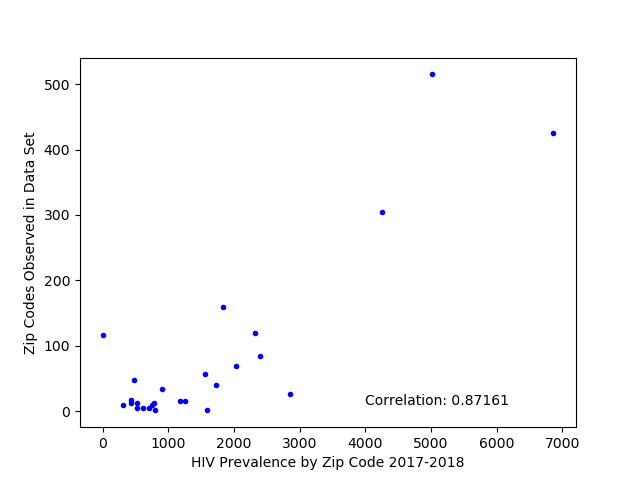

Text(4000, 10, 'Correlation: 0.87161')

In [34]:
for_corr = list(zip(*pts))
plt.plot(for_corr[0],for_corr[1], '.b')
plt.xlabel("HIV Prevalence by Zip Code 2017-2018")
plt.ylabel('Zip Codes Observed in Data Set')
plt.text(4000,10,'Correlation: {:.5f}'.format(np.corrcoef(for_corr[0],for_corr[1])[0,1]))
# plt.plot([0,7000],[0,7000])
# plt.axis('equal')

Shapefile:

In [ ]:
import shapefile
sf = shapefile.Reader('../local_data/cb_2018_us_zcta510_500k/cb_2018_us_zcta510_500k')
# from https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_zcta510_500k.zip

In [7]:
zc = df.Zip.value_counts()
zips = [i.zip for i in sf.records()]
print("% not found in shapefile: {}".format(len([i for i in zips if int(i) not in zc])/len(zips)))

% not found in shapefile: 0.37433155080213903


In [ ]:
print(len(sf.shapes()))
sf.shape(0)
df = records_to_df(sf)

In [ ]:
df.head()

In [ ]:
[sf.shapeRecord(i).record for i in range(2000,2010)]
sf.shapeRecord(0).record.as_dict()

In [ ]:
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
f = plt.figure()
a = plt.axes()
for shape in tqdm(sf.shapes()):
    patch = plt.Polygon(shape.points)
    plt.gca().add_patch(patch)
# plt.xlim([-125,-66])
# plt.ylim([25,49.5]) # usa
# filter to these lat long?
plt.xlim([-123,-121])
plt.ylim([37,39]) # sf bay area

Geopandas:

In [ ]:
import geopandas
g = geopandas.read_file('../local_data/cb_2018_us_zcta510_500k/cb_2018_us_zcta510_500k.shp')
# from https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_zcta510_500k.zip

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

g.plot()
# plt.gcf().set_size_inches((30,8))
plt.xlim([-125,-66])
plt.ylim([25,49.5]) # usa
plt.savefig('zips_current_usa.png', dpi=300)
# plt.savefig('zips_current.pdf')

In [ ]:
plt.figure()
mercator = g.to_crs(epsg=3395)
mercator.plot()
# plt.gcf().set_size_inches((30,8))
plt.xlim([-1.4e7,-0.6e7])
plt.ylim([0.2e7,0.65e7]) # usa
plt.savefig('zips_current_mercator.png', dpi=300)
# plt.savefig('zips_current_mercator.pdf')

# pdfs are very large, ~50MB